In [ ]:
#  Classifying MNIST handwritten images as 0-9

!pip install tensorflow keras numpy mnist matplotlib

In [2]:
import numpy as np
import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [3]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [4]:
# Normalise the data
train_images = (train_images/255) - 0.5
test_images = (test_images/255) - 0.5

# Reshape (inout = 28x28 image) - 784 dimensional vector
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape)
test_images.shape

(60000, 784)


(10000, 784)

In [5]:
#  Model Building
# Input layer and output layer

model = Sequential()

model.add(Dense(64, activation="relu", input_dim = 784))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [6]:
# Model compiling

model.compile(
    optimizer='adam',
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [7]:
model.fit(
    train_images,
    to_categorical(train_labels),
    epochs = 15,
    batch_size = 32, 

)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3578 - accuracy: 0.8925
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1807 - accuracy: 0.9450
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1409 - accuracy: 0.9567
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1192 - accuracy: 0.9635
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1036 - accuracy: 0.9678
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0924 - accuracy: 0.9707
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0837 - accuracy: 0.9740
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0768 - accuracy: 0.9756
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0701 - accuracy: 0.9773
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.065

In [8]:
model.evaluate(
    test_images,
    to_categorical(test_labels)
)

313/313 [==============================] - 1s 2ms/step - loss: 0.1296 - accuracy: 0.9653


[0.12962613999843597, 0.9653000235557556]

In [18]:
model.save_weights("model.h5")

In [9]:
# Prediction 

predictions = model.predict(test_images[:5])
print(np.argmax(predictions, axis = 1))
print(test_labels[:5])

[7 2 1 0 4]
[7 2 1 0 4]


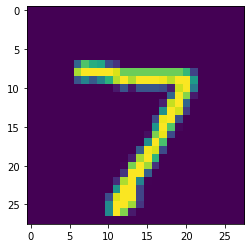

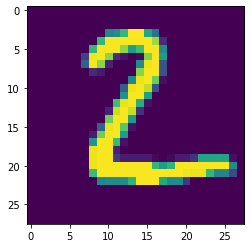

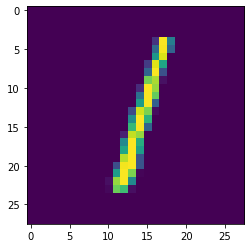

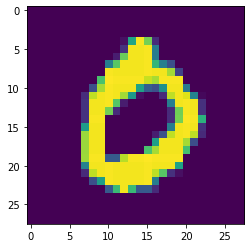

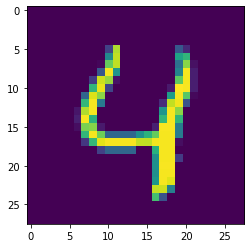

In [26]:
for i in range(5):
  f_image = test_images[i]
  f_image = np.array(f_image, dtype = "float")
  pix = f_image.reshape(28, 28)
  plt.imshow(pix)
  plt.show()

In [61]:
# Second model by changing the input images to binary colors
pic_train = mnist.train_images()
pic_test = mnist.test_images()

labels_train = mnist.train_labels()
labels_test = mnist.test_labels()

In [85]:
mnist.train_images()[0].shape()

TypeError: ignored

In [62]:
pic_train = np.where(pic_train > 0, 255, 0)
pic_test = np.where(pic_test > 0, 255, 0)

In [63]:
# Normalise the data
pic_train = (pic_train/255) - 0.5
pic_test = (pic_test/255) - 0.5

# Reshape (inout = 28x28 image) - 784 dimensional vector
pic_train = pic_train.reshape((-1, 784))
pic_test = pic_test.reshape((-1, 784))

print(pic_train.shape)
pic_test.shape

(60000, 784)


(10000, 784)

In [64]:
# Model structure
bw_model = Sequential()

bw_model.add(Dense(64, activation="relu", input_dim = 784))
bw_model.add(Dense(64, activation='relu'))
bw_model.add(Dense(10, activation="softmax"))

In [65]:
bw_model.compile(
    optimizer = 'adam', 
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
    
)

In [66]:
bw_model.fit(
    pic_train,
    to_categorical(labels_train),
    epochs = 15,
    batch_size = 32
)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3256 - accuracy: 0.9021
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1686 - accuracy: 0.9482
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1328 - accuracy: 0.9581
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1096 - accuracy: 0.9653
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0981 - accuracy: 0.9691
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0852 - accuracy: 0.9729
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0749 - accuracy: 0.9765
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0695 - accuracy: 0.9778
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0635 - accuracy: 0.9791
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.057

In [67]:
bw_model.evaluate(
    pic_test,
    to_categorical(labels_test)
)

313/313 [==============================] - 1s 2ms/step - loss: 0.1211 - accuracy: 0.9711


[0.12113527953624725, 0.9710999727249146]

In [70]:
bw_model.save("bw_model.h5")

In [73]:
from tensorflow import keras
new = keras.models.load_model('bw_model.h5')

In [78]:
predictions = new.predict(pic_test[:5])
np.argmax(predictions, axis = 1)

array([7, 2, 1, 0, 4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 255 255 255 255 255 255   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 255 255   0   0   0   0   0 255 255   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 255   0   0   0   0   0   0   0 255 255
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 255 255   0   0   0   0   0   0   

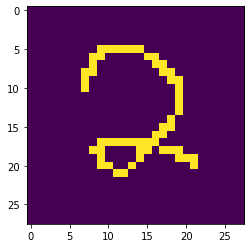

In [96]:
import cv2

number = cv2.imread("2.png", cv2.IMREAD_GRAYSCALE)
number = cv2.resize(number, (28, 28))
number = cv2.bitwise_not(number)
number = np.where(number > 0, 255, 0)
print(number)
plt.imshow(number)
plt.show()

In [97]:
number = number/255 - 0.5

number = number.reshape((-1, 784))

In [99]:
np.argmax(new.predict(number))

2